In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.pyplot import plot, draw, show
from scipy.linalg import lu
import scipy.linalg as la
import random
import simpy
import math
import seaborn as sns

In [97]:
plt.rcParams['figure.figsize'] = [15, 5]

def plotpretify(ax, maxx, minx=0, miny=None, maxy=None, 
                Grid=True, LB=True, LL=True):
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        labelbottom=LB,
        left=False,
        right=False,
        labelleft=LL)
    ax.grid(Grid)
    
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)

hoi


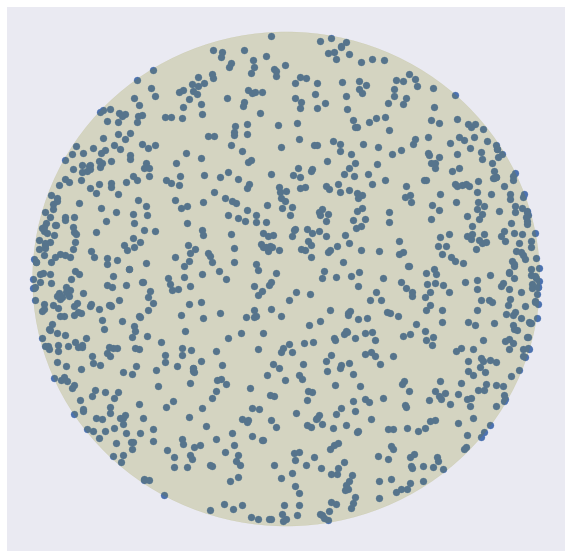

In [116]:
def incircle(x, y, r=1):
    return np.power(x,2) + np.power(y,2) < r

def spawn(x=None, r=1):
    if x:
        print("hoi")
    x=random.uniform(-1, 1)
    limits = [-np.sqrt(1 - x**2), np.sqrt(1 - x**2)]
    y=random.uniform(limits[0], limits[1])
#     print(f"(x,y) = ({x}, {y})")
    return x, y
    
xlist = []
ylist = []
for i in range(1000):
    x, y = spawn()
    xlist.append(x)
    ylist.append(y)
    
spawn(x=[0,0.2])
 
plt.rcParams['figure.figsize'] = [10, 10]
sns.set()
sns.set_style("dark")
fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(xlist, ylist)
circle1 = plt.Circle((0, 0), 1, alpha=0.2, color="olive")
ax.add_artist(circle1)
plotpretify(ax, 1.1, minx=-1.1, miny=-1.1, maxy=1.1, Grid=False, LL=False, LB=False)